### Importing libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
from scipy.stats.distributions import chi2
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.stattools as sts
import warnings
warnings.filterwarnings('ignore')

### Importing data and preprocessing

In [2]:
#reading in the data and performing basic preprocessing
data = pd.read_csv('Index2018.csv')
df = data.copy #copying the dataframe
df.date = pd.to_datetime(df.date, dayfirst = True) #parsing dates
df.set_index('date', inplace = True) #setting date column as index
df.asfreq('b') #setting a constant frequency as business days
df.fillna('ffill') #filling missing or nan values

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


In [3]:
# keeping only ftse column and removing rest 
df['market_value'] = df.ftse
#del df['spx']
#del df['dax']
#del df['ftse']
#del df['nikkei']

#splitting the data into training and testing data
size = int(len(df)*0.8)
df_train = df.iloc[:size]
df_test = df.iloc[size:]

In [4]:
def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    LR = 2*(L2-L1)
    p = chi2.sf(LR, DF).round(3)
    return p

In [6]:
#calculating returns
df_train['returns'] = (df_train.market_value.pct_change(1)*100)
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns
date,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166


In [7]:
#calculating squared returns
df_train['squared_returns'] = (df_train.returns**2)
df_train.head()

,spx,dax,ftse,nikkei,market_value,returns,squared_returns
date,,,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58,-0.156704,0.024556
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77,-0.779229,0.607198
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02,-1.222988,1.495700
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01,-0.356166,0.126854


### Plotting returns and squared returns and their PACF

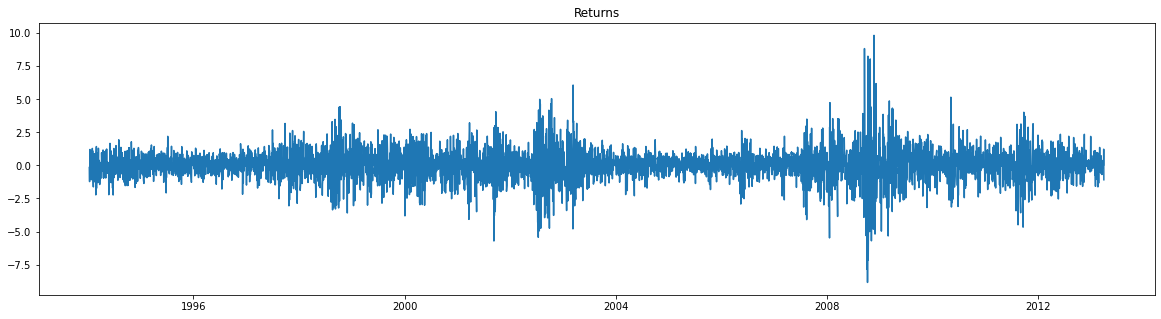

In [11]:
plt.plot(df_train.returns)
plt.title('Returns',size = 12)
plt.show()

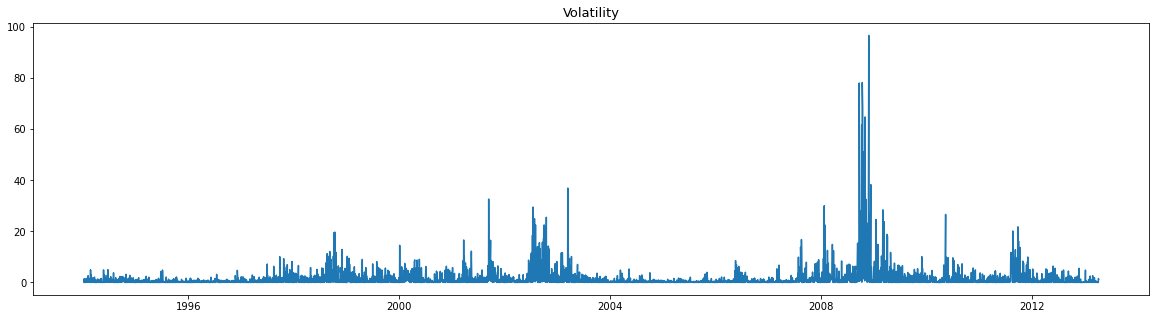

In [12]:
plt.plot(df_train.squared_returns)
plt.title('Volatility',size = 13)
plt.show()

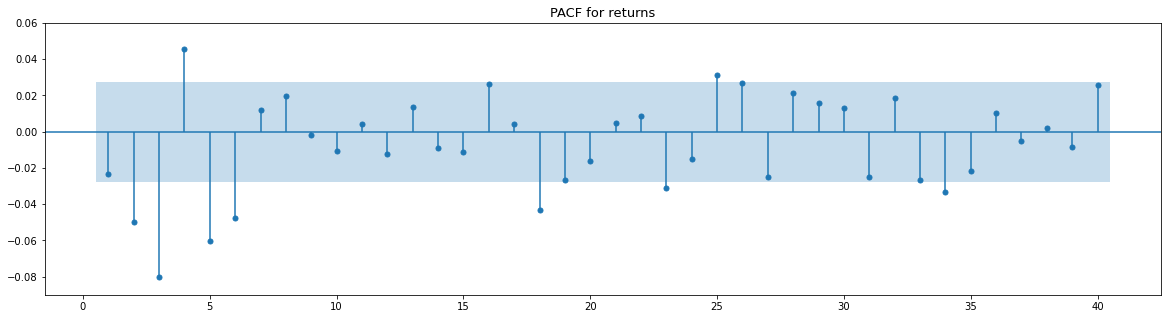

In [16]:
#plotting PACF for both
sgt.plot_pacf(df_train['returns'][1:],lags = 40, zero = False)
plt.title('PACF for returns',size = 13)
plt.ylim(-.09,.06)
plt.show()

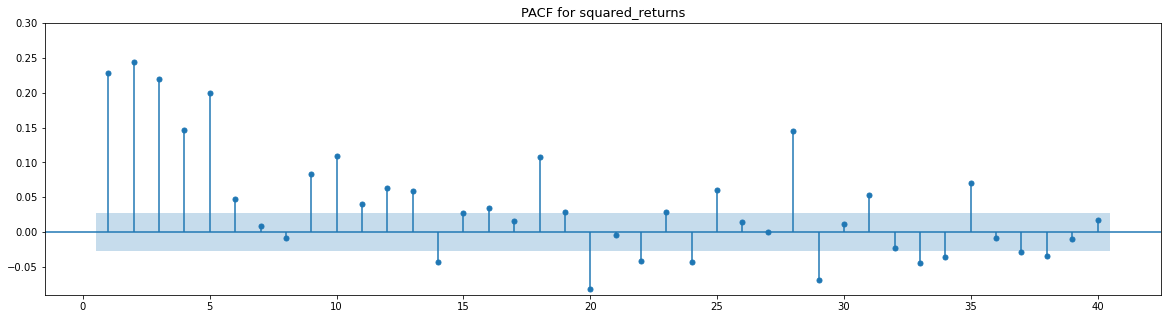

In [21]:
sgt.plot_pacf(df_train['squared_returns'][1:],lags = 40, zero = False)
plt.title('PACF for squared_returns',size = 13)
plt.ylim(-.09,0.3)
plt.show()

### Simple ARCH model

In [22]:
#importing libraries
from arch import arch_model

In [23]:
#we shall see what happens if we don't give any arguments to the model other than the dataset itself
model_arch_1 = arch_model(df_train.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()
#the model is different from what we expected

Iteration:      1,   Func. Count:      6,   Neg. LLF: 61920196788.00501
Iteration:      2,   Func. Count:     15,   Neg. LLF: 1275732739.0439079
Iteration:      3,   Func. Count:     23,   Neg. LLF: 6998.792911884666
Iteration:      4,   Func. Count:     29,   Neg. LLF: 7013.835643120716
Iteration:      5,   Func. Count:     35,   Neg. LLF: 6999.76001312972
Iteration:      6,   Func. Count:     41,   Neg. LLF: 6965.959067783337
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7105.373702349442
Iteration:      8,   Func. Count:     53,   Neg. LLF: 6964.655094124608
Iteration:      9,   Func. Count:     59,   Neg. LLF: 6960.803585081345
Iteration:     10,   Func. Count:     64,   Neg. LLF: 6960.773155336987
Iteration:     11,   Func. Count:     69,   Neg. LLF: 6960.773069582333
Iteration:     12,   Func. Count:     74,   Neg. LLF: 6960.773068243478
Iteration:     13,   Func. Count:     78,   Neg. LLF: 6960.773068242948
Optimization terminated successfully    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6960.77
Distribution:                  Normal   AIC:                           13929.5
Method:            Maximum Likelihood   BIC:                           13955.6
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        15:11:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.181e-02      3.987  6.703e-05 [2.394e-02,7.025e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0107  2.927e-03      3.649  2.635e-04 [4.943e-03,1.642e-02]
alpha[1]       0.0830  1.050e-02      7.909  2.603e-15   [6.243e-02,  0.104]
beta[1]        0.9095  1.123e-02     81.025      0.000     [  0.888,  0.932]
============================================================================

Covariance estimator: robust
"""

In [24]:
model_arch_1 = arch_model(df_train.returns[1:],mean = 'Constant', vol = "ARCH",p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 10) #to see every 10th iteration only
results_arch_1.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7651.690841351308
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7651.69
Distribution:                  Normal   AIC:                           15309.4
Method:            Maximum Likelihood   BIC:                           15328.9
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        15:13:51   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0344  1.602e-02      2.150  3.157e-02 [3.041e-03,6.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9192  4.320e-02     21.277 1.841e-100 [  0.835,  1.004]
alpha[1]       0.3707  5.078e-02      7.301  2.853e-13 [  0.271,  0.470]
========================================================================

Covariance estimator: robust
"""

### Higher lags ARCH models

In [25]:
model_arch_2 = arch_model(df_train.returns[1:],mean = 'Constant', vol = "ARCH",p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 10) #to see every 10th iteration only
results_arch_2.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 7440.401321890164
            Iterations: 9
            Function evaluations: 58
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7440.40
Distribution:                  Normal   AIC:                           14888.8
Method:            Maximum Likelihood   BIC:                           14914.9
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        15:38:53   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0488  1.401e-02      3.481  5.001e-04 [2.130e-02,7.622e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6960  3.569e-02     19.502  1.060e-84 [  0.626,  0.766]
alpha[1]       0.2214  3.493e-02      6.339  2.306e-10 [  0.153,  0.290]
alpha[2]       0.2791  3.643e-02      7.663  1.813e-14 [  0.208,  0.351]
========================================================================

Covariance estimator: robust
"""

In [26]:
#similarly we can see other higher lags until the llf doesn't increase anymore. We get that at lag 13
model_arch_13 = arch_model(df_train.returns[1:],mean = 'Constant', vol = "ARCH",p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 10) #to see every 10th iteration only
results_arch_13.summary()

Iteration:     10,   Func. Count:    179,   Neg. LLF: 8145.717758497964
Iteration:     20,   Func. Count:    359,   Neg. LLF: 7149.190724256554
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6975.532168019131
            Iterations: 26
            Function evaluations: 461
            Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -6975.53
Distribution:                  Normal   AIC:                           13981.1
Method:            Maximum Likelihood   BIC:                           14078.9
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        15:39:38   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0504  1.212e-02      4.155  3.258e-05 [2.661e-02,7.413e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1872  2.248e-02      8.327  8.285e-17      [  0.143,  0.231]
alpha[1]       0.0576  1.744e-02      3.301  9.641e-04  [2.339e-02,9.177e-02]
alpha[2]       0.1164  2.034e-02      5.722  1.054e-08    [7.651e-02,  0.156]
alpha[3]       0.1235  2.594e-02      4.761  1.930e-06    [7.265e-02,  0.174]
alpha[4]       0.0844  2.161e-02      3.904  9.447e-05    [4.202e-02,  0.127]
alpha[5]       0.0694  1.746e-02      3.975  7.044e-05    [3.519e-02,  0.104]
alpha[6]       0.0877  1.937e-02      4.526  6.022e-06    [4.970e-02,  0.126]
alpha[7]       0.0397  1.854e-02      2.142  3.222e-02  [3.369e-03,7.606e-02]
alpha[8]       0.0665  1.847e-02      3.600  3.177e-04    [3.030e-02,  0.103]
alpha[9]       0.0330  1.640e-02      2.011  4.435e-02  [8.329e-04,6.511e-02]
alpha[10]      0.0297  1.580e-02      1.882  5.980e-02 [-1.228e-03,6.072e-02]
alpha[11]      0.0792  1.760e-02      4.498  6.872e-06    [4.467e-02,  0.114]
alpha[12]      0.0439  1.856e-02      2.364  1.808e-02  [7.496e-03,8.024e-02]
alpha[13]      0.0412  1.463e-02      2.818  4.825e-03  [1.256e-02,6.992e-02]
=============================================================================

Covariance estimator: robust
"""

### GARCH models

In [28]:
model_garch_1_1 = arch_model(df_train.returns[1:],mean= 'Constant', vol = "GARCH", p =1 , q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 10)
results_garch_1_1.summary()

Iteration:     10,   Func. Count:     64,   Neg. LLF: 6960.773155336987
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6960.773068243478
            Iterations: 13
            Function evaluations: 78
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6960.77
Distribution:                  Normal   AIC:                           13929.5
Method:            Maximum Likelihood   BIC:                           13955.6
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        16:09:41   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.181e-02      3.987  6.703e-05 [2.394e-02,7.025e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0107  2.927e-03      3.649  2.635e-04 [4.943e-03,1.642e-02]
alpha[1]       0.0830  1.050e-02      7.909  2.603e-15   [6.243e-02,  0.104]
beta[1]        0.9095  1.123e-02     81.025      0.000     [  0.888,  0.932]
============================================================================

Covariance estimator: robust
"""

Checkin higher lag GARCH models and reaffirming the notion that GARCH(1,1) is superior to its more complex counterparts


In [29]:
model_garch_1_2 = arch_model(df_train.returns[1:],mean= 'Constant', vol = "GARCH", p =1 , q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 10)
results_garch_1_2.summary()

Iteration:     10,   Func. Count:     71,   Neg. LLF: 6960.773587988871
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6960.7730682589645
            Iterations: 13
            Function evaluations: 88
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6960.77
Distribution:                  Normal   AIC:                           13931.5
Method:            Maximum Likelihood   BIC:                           13964.1
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        16:10:57   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.181e-02      3.986  6.707e-05 [2.394e-02,7.025e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0107  2.875e-03      3.714  2.040e-04 [5.044e-03,1.632e-02]
alpha[1]       0.0830  1.194e-02      6.954  3.550e-12   [5.961e-02,  0.106]
beta[1]        0.9095      0.184      4.938  7.879e-07     [  0.549,  1.271]
beta[2]        0.0000      0.176      0.000      1.000     [ -0.345,  0.345]
============================================================================

Covariance estimator: robust
"""

In [30]:
model_garch_1_3 = arch_model(df_train.returns[1:],mean= 'Constant', vol = "GARCH", p =1 , q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 10)
results_garch_1_3.summary()

Iteration:     10,   Func. Count:     86,   Neg. LLF: 6961.408433967282
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6960.773070070953
            Iterations: 15
            Function evaluations: 121
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6960.77
Distribution:                  Normal   AIC:                           13933.5
Method:            Maximum Likelihood   BIC:                           13972.7
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        16:11:12   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0471  1.178e-02      3.998  6.400e-05 [2.400e-02,7.018e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0107  5.055e-03      2.113  3.463e-02 [7.717e-04,2.059e-02]
alpha[1]       0.0830  3.547e-02      2.340  1.928e-02   [1.348e-02,  0.153]
beta[1]        0.9095      1.269      0.717      0.473     [ -1.577,  3.396]
beta[2]    9.7943e-08      2.000  4.897e-08      1.000     [ -3.920,  3.920]
beta[3]    7.2094e-08      0.772  9.339e-08      1.000     [ -1.513,  1.513]
============================================================================

Covariance estimator: robust
"""

In [31]:
model_garch_2_1 = arch_model(df_train.returns[1:],mean= 'Constant', vol = "GARCH", p =2 , q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 10)
results_garch_2_1.summary()

Iteration:     10,   Func. Count:     75,   Neg. LLF: 6958.697514370089
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6958.6973026416035
            Iterations: 12
            Function evaluations: 86
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6958.70
Distribution:                  Normal   AIC:                           13927.4
Method:            Maximum Likelihood   BIC:                           13960.0
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        16:11:29   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0470  1.184e-02      3.970  7.186e-05 [2.379e-02,7.018e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0125  3.899e-03      3.203  1.361e-03  [4.846e-03,2.013e-02]
alpha[1]       0.0555  1.680e-02      3.306  9.463e-04  [2.262e-02,8.848e-02]
alpha[2]       0.0364  2.304e-02      1.581      0.114 [-8.736e-03,8.160e-02]
beta[1]        0.8993  1.632e-02     55.089      0.000      [  0.867,  0.931]
=============================================================================

Covariance estimator: robust
"""

In [32]:
model_garch_3_1 = arch_model(df_train.returns[1:],mean= 'Constant', vol = "GARCH", p =3 , q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 10)
results_garch_3_1.summary()

Iteration:     10,   Func. Count:     85,   Neg. LLF: 6958.725370812605
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6958.697302321653
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6958.70
Distribution:                  Normal   AIC:                           13929.4
Method:            Maximum Likelihood   BIC:                           13968.5
                                        No. Observations:                 5014
Date:                Tue, Jan 31 2023   Df Residuals:                     5013
Time:                        16:11:46   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0470  1.183e-02      3.973  7.087e-05 [2.381e-02,7.017e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0125  4.478e-03      2.789  5.291e-03  [3.711e-03,2.126e-02]
alpha[1]       0.0555  1.680e-02      3.305  9.482e-04  [2.261e-02,8.847e-02]
alpha[2]       0.0364  2.496e-02      1.460      0.144 [-1.247e-02,8.535e-02]
alpha[3]       0.0000  2.476e-02      0.000      1.000 [-4.853e-02,4.853e-02]
beta[1]        0.8993  2.085e-02     43.122      0.000      [  0.858,  0.940]
=============================================================================

Covariance estimator: robust
"""

In all the more complex GARCH models, we get insignificant coefficients for all the higher lag errors or conditional variances